# Проверка градиента и гессиана с помощью конечных разностей

In [38]:
from lab1 import oracles
import numpy as np
m, n = 50, 50
A = np.random.rand(m, n)
x = np.random.rand(n)
b = np.sign(A.dot(x))
regcoef = 0.1

# Создание оракула
oracle = oracles.create_log_reg_oracle(A, b, regcoef, oracle_type='usual')

# Сравнение градиентов
g_anal = oracle.grad(x)
g_numer = oracles.grad_finite_diff(oracle.func, x)
print('Градиент (аналитический):', g_anal)
print('Градиент (численный):    ', g_numer)
print('Норма разности:', np.linalg.norm(g_anal - g_numer))

# Сравнение гессианов
H_anal = oracle.hess(x)
H_numer = oracles.hess_finite_diff(oracle.func, x)
print('Гессиан (аналитический):\n', H_anal)
print('Гессиан (численный):\n', H_numer)
print('Норма разности:', np.linalg.norm(H_anal - H_numer))

Градиент (аналитический): [6.22515690e-02 3.60539699e-02 7.67709002e-02 5.60723701e-02
 6.15338756e-02 9.58585753e-02 4.63779832e-02 9.12080413e-02
 6.11477293e-02 7.68986680e-02 7.71525417e-02 9.97162864e-02
 4.78527534e-02 9.84096150e-02 7.69861193e-02 2.39528552e-02
 1.60055991e-02 5.33411507e-02 3.39432715e-02 3.40687709e-02
 1.59205718e-02 2.89140254e-02 8.87060538e-02 1.25276806e-02
 4.81772171e-02 7.93154719e-02 6.95575636e-02 2.01549406e-02
 5.28680629e-02 1.87009044e-02 7.67326467e-02 7.82006785e-02
 3.01611314e-02 5.47234321e-02 2.46513869e-02 3.39010349e-05
 7.43952295e-02 3.18338711e-02 8.60188364e-02 3.94798170e-02
 1.50568349e-02 9.60805363e-02 7.90909907e-02 6.14304535e-02
 3.56885367e-02 7.75760840e-02 1.34939073e-02 4.91326224e-02
 5.25099784e-02 7.99310841e-02]
Градиент (численный):     [6.22510932e-02 3.60536045e-02 7.67707009e-02 5.60721469e-02
 6.15336671e-02 9.58579882e-02 4.63779015e-02 9.12078191e-02
 6.11476425e-02 7.68984876e-02 7.71521735e-02 9.97161242e-02
 

# Эксперимент 1
Траектория градиентного спуска на 
квадратичной функции

C:\Users\user\lab1\plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


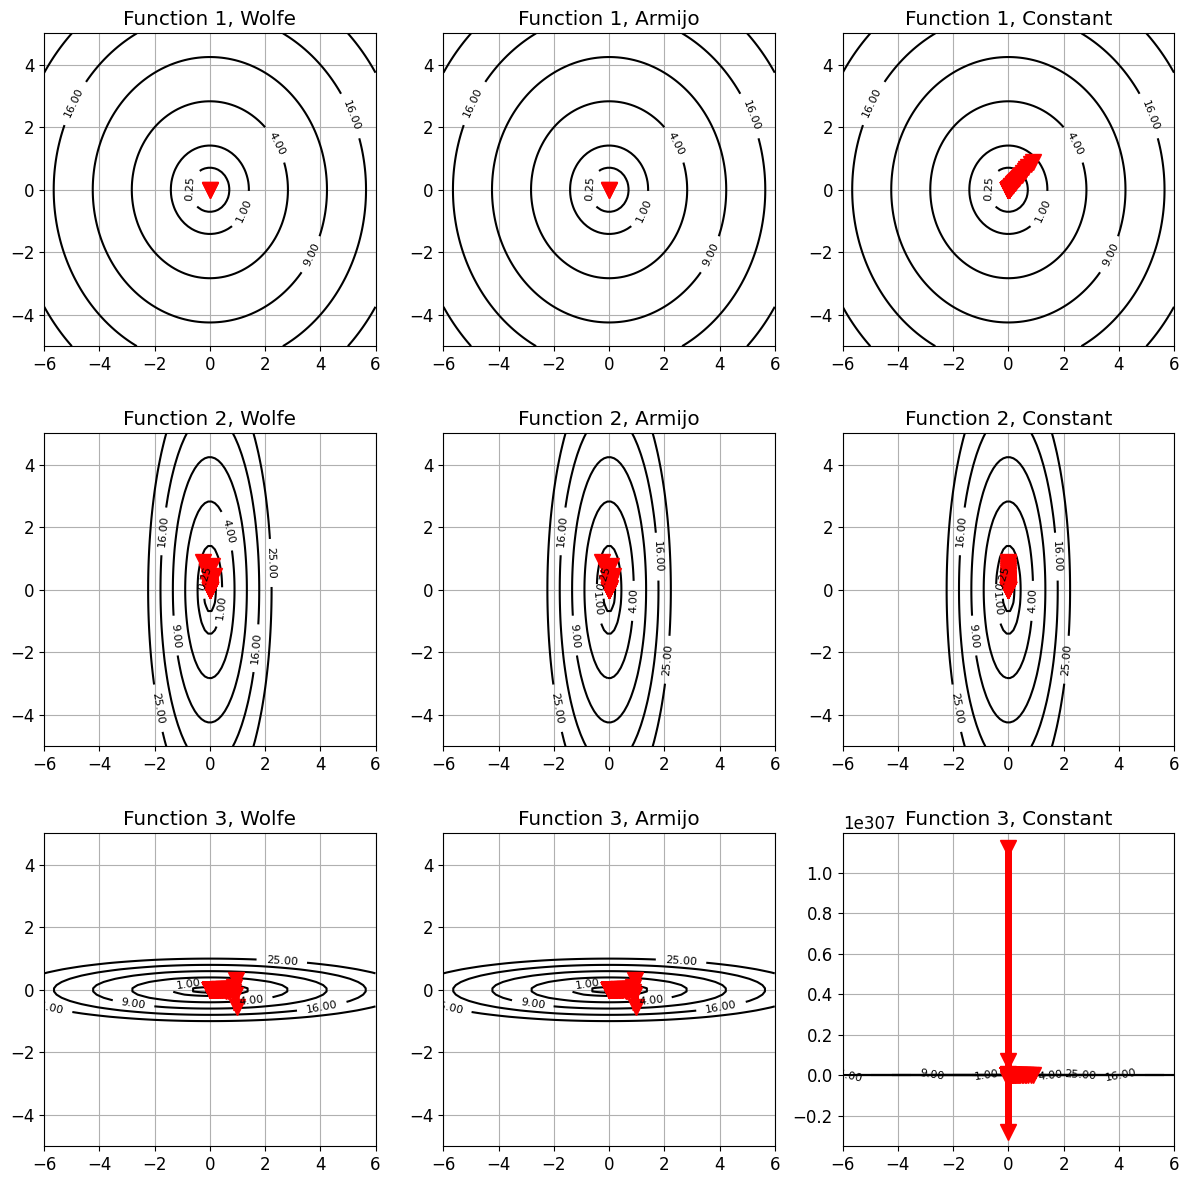

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from lab1.oracles import QuadraticOracle
from lab1.optimization import gradient_descent
from lab1.plot_trajectory_2d import plot_levels, plot_trajectory

A1 = np.eye(2)
b1 = np.zeros(2)
oracle1 = QuadraticOracle(A1, b1)

A2 = np.diag([10, 1])
b2 = np.zeros(2)
oracle2 = QuadraticOracle(A2, b2)

A3 = np.diag([1, 50])
b3 = np.zeros(2)
oracle3 = QuadraticOracle(A3, b3)

x0_1 = np.array([1.0, 1.0])
x0_2 = np.array([1.0, 0.3])

tolerance = 1e-9
max_iter = 1000


line_search_options_wolfe = {'method': 'Wolfe', 'c1': 1e-4, 'c2': 0.9}
line_search_options_armijo = {'method': 'Armijo', 'c1': 1e-4}
line_search_options_constant = {'method': 'Constant', 'c': 0.1}

_, _, history1_wolfe = gradient_descent(oracle1, x0_1, tolerance, max_iter, line_search_options_wolfe, trace=True)
_, _, history1_armijo = gradient_descent(oracle1, x0_1, tolerance, max_iter, line_search_options_armijo, trace=True)
_, _, history1_constant = gradient_descent(oracle1, x0_1, tolerance, max_iter, line_search_options_constant, trace=True)

_, _, history2_wolfe = gradient_descent(oracle2, x0_1, tolerance, max_iter, line_search_options_wolfe, trace=True)
_, _, history2_armijo = gradient_descent(oracle2, x0_1, tolerance, max_iter, line_search_options_armijo, trace=True)
_, _, history2_constant = gradient_descent(oracle2, x0_1, tolerance, max_iter, line_search_options_constant, trace=True)

_, _, history3_wolfe = gradient_descent(oracle3, x0_1, tolerance, max_iter, line_search_options_wolfe, trace=True)
_, _, history3_armijo = gradient_descent(oracle3, x0_1, tolerance, max_iter, line_search_options_armijo, trace=True)
_, _, history3_constant = gradient_descent(oracle3, x0_1, tolerance, max_iter, line_search_options_constant, trace=True)

plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
plot_levels(oracle1.func)
plot_trajectory(oracle1.func, history1_wolfe['x'])
plt.title('Function 1, Wolfe')

plt.subplot(3, 3, 2)
plot_levels(oracle1.func)
plot_trajectory(oracle1.func, history1_armijo['x'])
plt.title('Function 1, Armijo')

plt.subplot(3, 3, 3)
plot_levels(oracle1.func)
plot_trajectory(oracle1.func, history1_constant['x'])
plt.title('Function 1, Constant')

plt.subplot(3, 3, 4)
plot_levels(oracle2.func)
plot_trajectory(oracle2.func, history2_wolfe['x'])
plt.title('Function 2, Wolfe')

plt.subplot(3, 3, 5)
plot_levels(oracle2.func)
plot_trajectory(oracle2.func, history2_armijo['x'])
plt.title('Function 2, Armijo')

plt.subplot(3, 3, 6)
plot_levels(oracle2.func)
plot_trajectory(oracle2.func, history2_constant['x'])
plt.title('Function 2, Constant')

plt.subplot(3, 3, 7)
plot_levels(oracle3.func)
plot_trajectory(oracle3.func, history3_wolfe['x'])
plt.title('Function 3, Wolfe')

plt.subplot(3, 3, 8)
plot_levels(oracle3.func)
plot_trajectory(oracle3.func, history3_armijo['x'])
plt.title('Function 3, Armijo')

plt.subplot(3, 3, 9)
plot_levels(oracle3.func)
plot_trajectory(oracle3.func, history3_constant['x'])
plt.title('Function 3, Constant')

plt.tight_layout()
plt.show()

# Эксперимент 2
Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

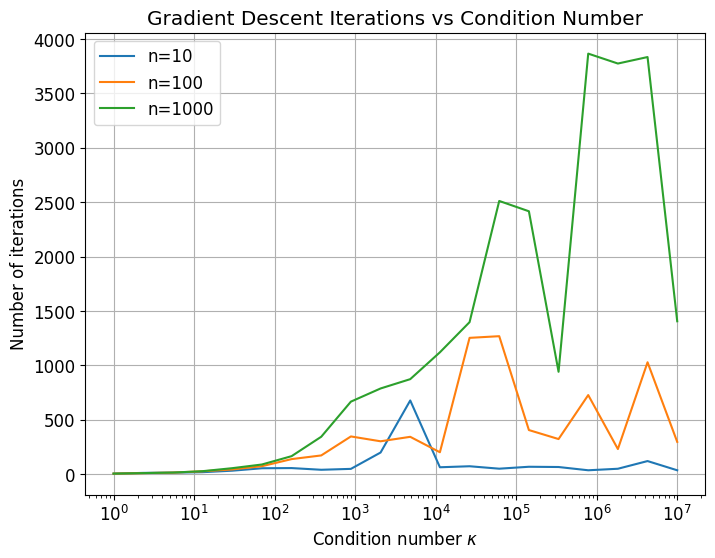

In [39]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

def run_experiment(n_values, kappa_values, num_trials, tolerance):
    results = {}
    
    for n in n_values:
        results[n] = []
        
        for kappa in kappa_values:
            num_iterations = []
            
            for _ in range(num_trials):
                a = np.random.uniform(1, kappa, size=n)
                A = scipy.sparse.diags(a)
                b = np.random.randn(n)
                
                oracle = QuadraticOracle(A, b)
                x_0 = np.zeros(n)
                x_star, message, history = gradient_descent(oracle, x_0, tolerance=tolerance, trace=True)
                
                num_iterations.append(len(history['func']))
            
            results[n].append(np.mean(num_iterations))
    
    return results

n_values = [10, 100, 1000]
kappa_values = np.logspace(0, 7, 20)
num_trials = 10
tolerance = 1e-5

results = run_experiment(n_values, kappa_values, num_trials, tolerance)

plt.figure(figsize=(8, 6))

for n, iterations in results.items():
    plt.plot(kappa_values, iterations, label=f'n={n}')

plt.xscale('log')
plt.xlabel('Condition number $\\kappa$')
plt.ylabel('Number of iterations')
plt.title('Gradient Descent Iterations vs Condition Number')
plt.legend()
plt.grid(True)
plt.show()

# Эксперимент 3
Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической 
регрессии

In [1]:
from sklearn.datasets import load_svmlight_file
import time
import numpy as np
import matplotlib.pyplot as plt
from lab1.oracles import create_log_reg_oracle
from lab1.optimization import gradient_descent
from lab1.optimization import LineSearchTool
from lab1.optimization import newton
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csr_matrix

line_search_options = {
    'method': 'Wolfe',
    'c1': 1e-4,        
    'c2': 0.9,         
    'alpha_0': 1       
}

line_search_tool = LineSearchTool(**line_search_options)

def load_data(file_path):
    data = load_svmlight_file(file_path)
    X, y = data[0], data[1]
    y[y == 0] = -1  
    return X, y



def prepare_oracle(X, y):
    regcoef = 1.0 / y.size
    oracle = create_log_reg_oracle(X, y, regcoef)
    return oracle

def prepare_start_point(X):
    return np.zeros(X.shape[1])


def run_optimization(oracle, x_0, optimizer, trace=True, display=False):
    if optimizer == 'gradient':
        x_star, status, history = gradient_descent(oracle, x_0, trace=trace,line_search_options=line_search_tool, display=display)
    elif optimizer == 'newton':
        x_star, status, history = newton(oracle, x_0, trace=trace,line_search_options=line_search_tool, display=display)
    else:
        raise ValueError("Unknown optimizer")
    return x_star, status, history

def plot_results(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history['time'], history['func'], label=label)
    plt.xlabel('Время')
    plt.ylabel('Значение функции')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.semilogy(history['time'], np.array(history['grad_norm'])**2 / history['grad_norm'][0]**2, label=label)
    plt.xlabel('Время')
    plt.ylabel('Относительный квадрат нормы градиента')
    plt.legend()
    plt.show()


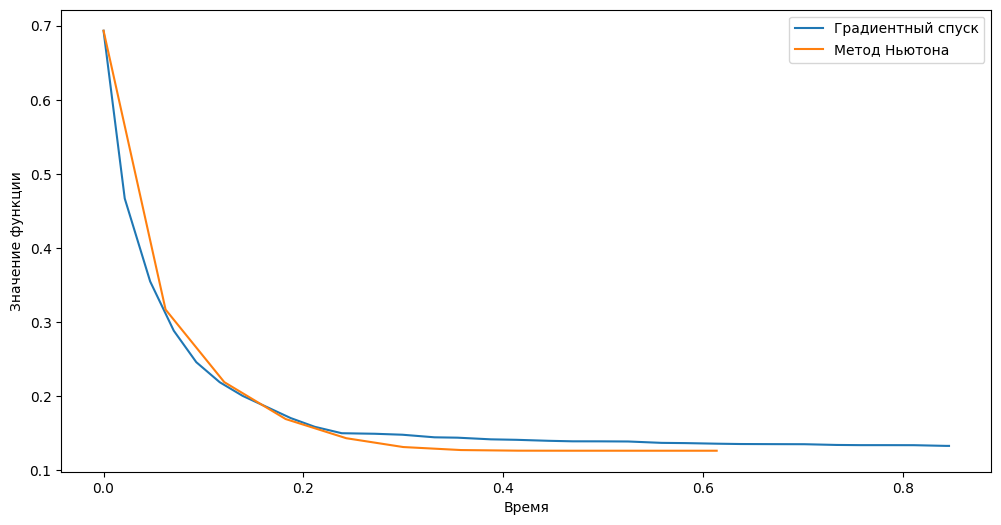

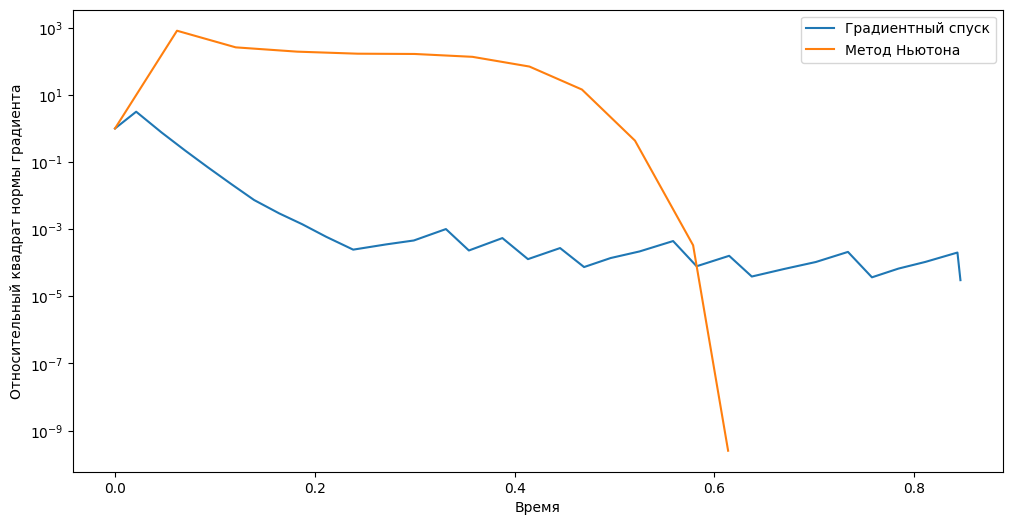

In [2]:
X, y = load_data('data/w8a.txt')
oracle = prepare_oracle(X, y)
x_0 = prepare_start_point(X)

x_star_gradient, status_gradient, history_gradient = run_optimization(oracle, x_0, 'gradient')
x_star_newton, status_newton, history_newton = run_optimization(oracle, x_0, 'newton')

plot_results([history_gradient, history_newton], ['Градиентный спуск', 'Метод Ньютона'])

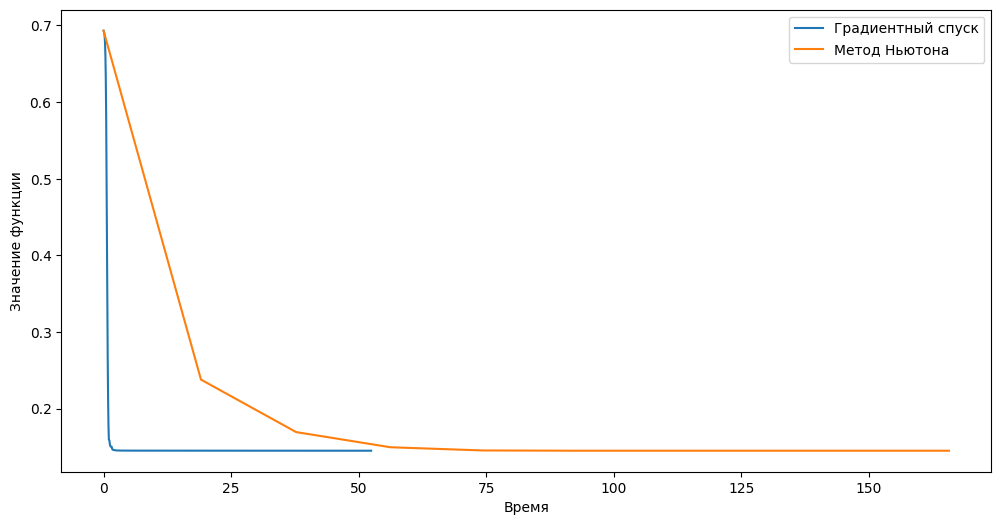

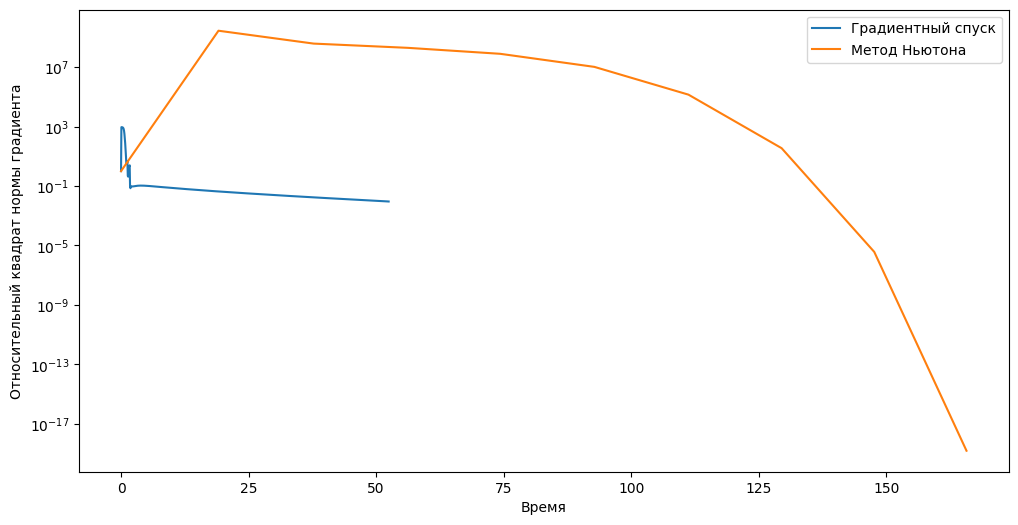

In [3]:
X, y = load_data('data/real-sim')
oracle = prepare_oracle(X, y)
x_0 = prepare_start_point(X)

x_star_gradient, status_gradient, history_gradient = run_optimization(oracle, x_0, 'gradient')
x_star_newton, status_newton, history_newton = run_optimization(oracle, x_0, 'newton')

plot_results([history_gradient, history_newton], ['Градиентный спуск', 'Метод Ньютона'])

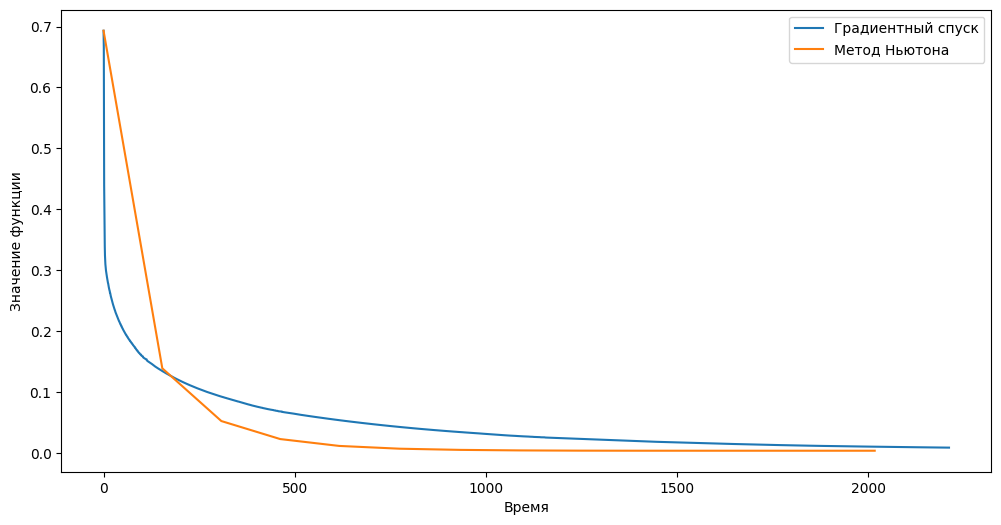

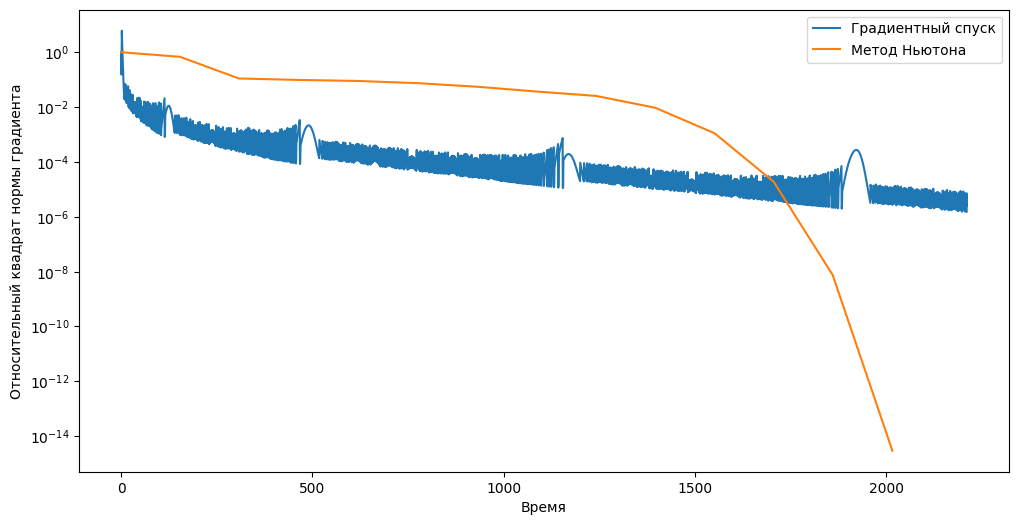

In [4]:
X, y = load_data('data/gisette_scale')
oracle = prepare_oracle(X, y)
x_0 = prepare_start_point(X)

x_star_gradient, status_gradient, history_gradient = run_optimization(oracle, x_0, 'gradient')
x_star_newton, status_newton, history_newton = run_optimization(oracle, x_0, 'newton')

plot_results([history_gradient, history_newton], ['Градиентный спуск', 'Метод Ньютона'])

# Эксперимент 4
Стратегия выбора длины шага в градиентном спуске

In [1]:
from lab1.oracles import QuadraticOracle
from lab1.oracles import create_log_reg_oracle
import numpy as np
from lab1.optimization import gradient_descent
import matplotlib.pyplot as plt
from scipy.special import expit
from collections import defaultdict
import time
params = [{'method': 'Constant', 'c': 1},
        {'method': 'Constant', 'c': 1e-2},
        {'method': 'Constant', 'c': 1e-3},
        {'method': 'Armijo', 'c1': 1e-2},
        {'method': 'Armijo', 'c1': 1e-3},
        {'method': 'Armijo', 'c1': 1e-4},
        {'method': 'Wolfe', 'c2': 0.9},
        {'method': 'Wolfe', 'c2': 0.5},
        {'method': 'Wolfe', 'c2': 0.2}, ]
A = np.random.randn(2, 2)
A = (A + A.T) / 2
for i in range(2):
    A[i][i] = 16 ** i
b = np.sign(np.random.randn(2))

oracle_quad = QuadraticOracle(A, b)
A = np.random.rand(5_000, 100)
y = np.sign(np.random.rand(5000))
oracle_lr = create_log_reg_oracle(A, y, regcoef=1 / 100)
func_qr, norm_lr, iters_qr, iters_lr = [], [], [], []
for i, ls in enumerate(params):
    _, _, hist_qr = gradient_descent(oracle_quad, x_0=[10, 20], line_search_options=ls, trace=True,display=True)
    _, _, hist_lr = gradient_descent(oracle_lr, x_0=np.random.randint(5, 10, size=100),
                                                  line_search_options=ls,
                                                  trace=True,display=True)

    func_qr.append(hist_qr['func'])
    norm_lr.append(hist_lr['grad_norm'])
    iters_qr.append(len(hist_qr['x']))
    iters_lr.append(len(hist_lr['grad_norm']))

iteration: 0
time: 0.0
grad_norm: 328.9328700954132


iteration: 1
time: 0.0
grad_norm: 4943.7072047399


iteration: 2
time: 0.0
grad_norm: 74321.93813633204


iteration: 3
time: 0.0
grad_norm: 1117329.6206975703


iteration: 4
time: 0.0
grad_norm: 16797536.67077603


iteration: 5
time: 0.0
grad_norm: 252528200.25473702


iteration: 6
time: 0.0
grad_norm: 3796419271.0972333


iteration: 7
time: 0.0
grad_norm: 57074018931.03257


iteration: 8
time: 0.0
grad_norm: 858030529383.1272


iteration: 9
time: 0.0
grad_norm: 12899326228333.82


iteration: 10
time: 0.0
grad_norm: 193923889007314.44


iteration: 11
time: 0.0
grad_norm: 2915382870550035.0


iteration: 12
time: 0.0
grad_norm: 4.3828830606712824e+16


iteration: 13
time: 0.0
grad_norm: 6.589070724660959e+17


iteration: 14
time: 0.0
grad_norm: 9.905774900582111e+18


iteration: 15
time: 0.0
grad_norm: 1.489199015784605e+20


iteration: 16
time: 0.0
grad_norm: 2.2388089078053981e+21


iteration: 17
time: 0.0
grad_norm: 3.3657457952508

C:\Users\user\lab1\oracles.py:54: RuntimeWarning: invalid value encountered in scalar subtract
  return 0.5 * np.dot(self.A.dot(x), x) - self.b.dot(x)
C:\Users\user\lab1\optimization.py:112: RuntimeWarning: invalid value encountered in subtract
  x_k = x_k - a_k * d_k


iteration: 162
time: 0.08129310607910156
grad_norm: 0.1369124515859687


iteration: 163
time: 0.08229327201843262
grad_norm: 0.13554332707010905


iteration: 164
time: 0.08529353141784668
grad_norm: 0.13418789379940796


iteration: 165
time: 0.08529353141784668
grad_norm: 0.13284601486141384


iteration: 166
time: 0.0866098403930664
grad_norm: 0.13151755471279972


iteration: 167
time: 0.0866098403930664
grad_norm: 0.13020237916567176


iteration: 168
time: 0.08760952949523926
grad_norm: 0.12890035537401504


iteration: 169
time: 0.08760952949523926
grad_norm: 0.12761135182027486


iteration: 170
time: 0.0886087417602539
grad_norm: 0.1263352383020721


iteration: 171
time: 0.0886087417602539
grad_norm: 0.1250718859190514


iteration: 172
time: 0.08960962295532227
grad_norm: 0.1238211670598609


iteration: 173
time: 0.08960962295532227
grad_norm: 0.12258295538926227


iteration: 174
time: 0.09064936637878418
grad_norm: 0.12135712583536966


iteration: 175
time: 0.09064936637878418
grad_

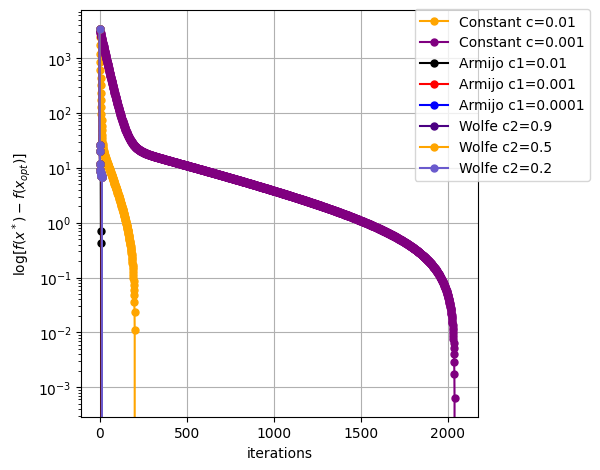

In [3]:
colors = ['green', 'orange', 'purple', 'black', 'red', 'blue', 'indigo', 'orange', 'slateblue']
names = ['Constant c=1',
         'Constant c=0.01',
         'Constant c=0.001',
         'Armijo c1=0.01',
         'Armijo c1=0.001',
         'Armijo c1=0.0001',
         'Wolfe c2=0.9',
         'Wolfe c2=0.5',
         'Wolfe c2=0.2']

for i in range(1, len(func_qr)):
    plt.plot(np.arange(iters_qr[i]), np.array(func_qr[i][:-1]), label=names[i], color=colors[i], linestyle='-', marker='o', markersize=5, linewidth=1.5)

plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel(r'$\log[f(x^*) - f(x_{opt})]$')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
plt.tight_layout()

plt.show()

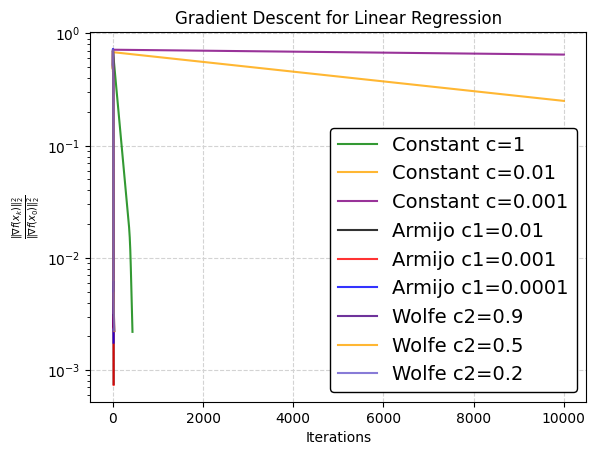

In [4]:
for i in range(len(func_qr)):
    plt.plot(np.arange(iters_lr[i]), np.array(norm_lr[i]), label=names[i], c=colors[i], alpha=0.8)

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r'$\frac{\|\nabla f(x_k)\|_2^2}{\|\nabla f(x_0)\|_2^2}$')
plt.title('Gradient Descent for Linear Regression')
plt.grid(True)
plt.legend(loc='best')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 14

# Customizing the legend
legend = plt.legend(loc='best')
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_alpha(1.0)

# Customizing the grid
plt.grid(color='lightgray', linestyle='--')

plt.show()

# Эксперимент 5
Стратегия выбора длины шага в методе Ньютона

In [6]:
from lab1.optimization import newton
params = [{'method': 'Constant', 'c': 1},
        {'method': 'Constant', 'c': 1e-2},
        {'method': 'Constant', 'c': 1e-3},
        {'method': 'Armijo', 'c1': 1e-2},
        {'method': 'Armijo', 'c1': 1e-3},
        {'method': 'Armijo', 'c1': 1e-4},
        {'method': 'Wolfe', 'c2': 0.9},
        {'method': 'Wolfe', 'c2': 0.5},
        {'method': 'Wolfe', 'c2': 0.2}, ]

A = np.random.randn(2, 2)
A = (A + A.T) / 2

for i in range(2):
    A[i][i] = 16 ** i

b = np.sign(np.random.randn(2))

oracle_quad = QuadraticOracle(A, b)
A = np.random.rand(5_000, 100)
y = np.sign(np.random.rand(5000))

oracle_lr = create_log_reg_oracle(A, y, regcoef=1 / 100)

func_qr, norm_lr, iters_qr, iters_lr = [], [], [], []

for i, ls in enumerate(params):
    _, _, hist_qr = newton(oracle_quad, x_0=[10, 20], line_search_options=ls, trace=True)
    _, _, hist_lr = newton(oracle_lr, x_0=np.random.randint(5, 10, size=100),
                                                  line_search_options=ls,
                                                  trace=True)

    func_qr.append(hist_qr['func'])
    norm_lr.append(hist_lr['grad_norm'])
    iters_qr.append(len(hist_qr['x']))
    iters_lr.append(len(hist_lr['grad_norm']))

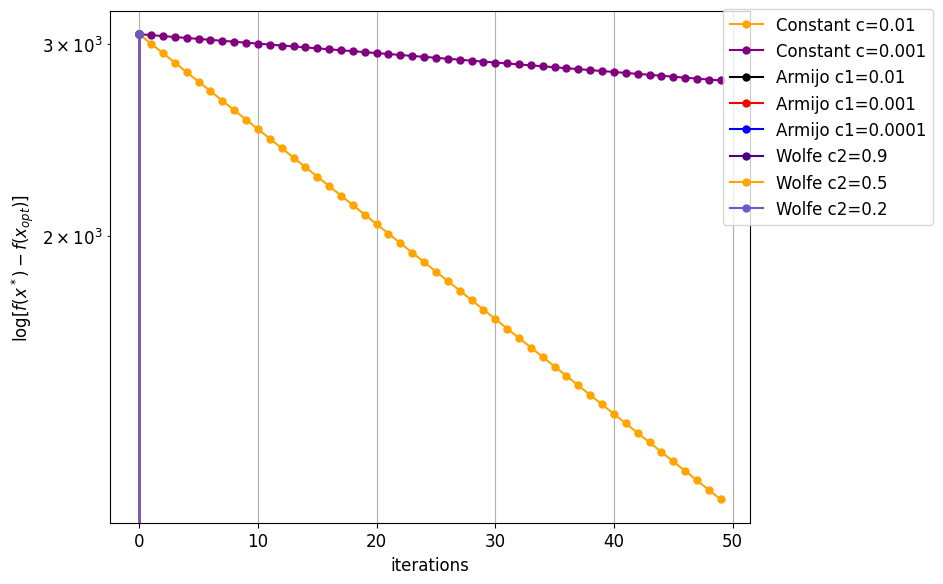

In [9]:
colors = ['green', 'orange', 'purple', 'black', 'red', 'blue', 'indigo', 'orange', 'slateblue']
names = ['Constant c=1',
         'Constant c=0.01',
         'Constant c=0.001',
         'Armijo c1=0.01',
         'Armijo c1=0.001',
         'Armijo c1=0.0001',
         'Wolfe c2=0.9',
         'Wolfe c2=0.5',
         'Wolfe c2=0.2']

for i in range(1, len(func_qr)):
    plt.plot(np.arange(iters_qr[i]), np.array(func_qr[i][:-1]), label=names[i], color=colors[i], linestyle='-', marker='o', markersize=5, linewidth=1.5)

plt.yscale('log')
plt.xlabel('iterations')
plt.ylabel(r'$\log[f(x^*) - f(x_{opt})]$')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
plt.tight_layout()

plt.show()

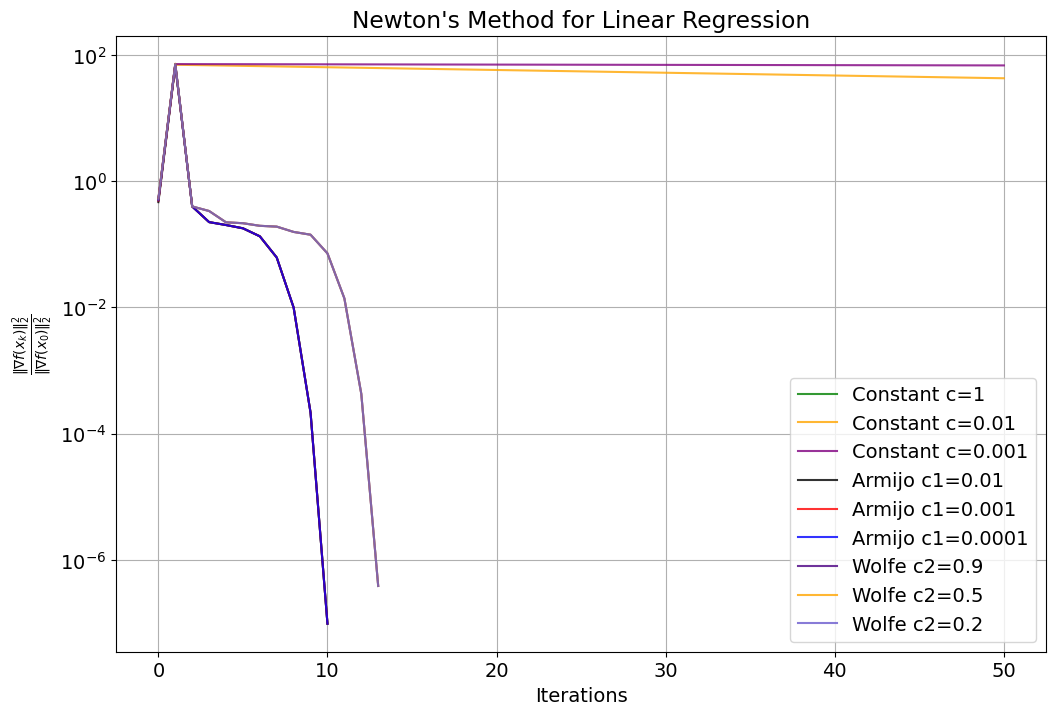

In [8]:
# Plotting the convergence curves
for i in range(len(func_qr)):
    plt.plot(np.arange(iters_lr[i]), np.array(norm_lr[i]), label=names[i], c=colors[i], alpha=0.8)

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r'$\frac{\|\nabla f(x_k)\|_2^2}{\|\nabla f(x_0)\|_2^2}$')
plt.title('Newton\'s Method for Linear Regression')
plt.grid(True)
plt.legend(loc='lower right')

# Adding additional styling
plt.rcParams['figure.figsize'] = [10, 6]  # Adjusting the figure size
plt.rcParams['font.size'] = 12  # Adjusting the font size
plt.rcParams['legend.frameon'] = True  # Adding frame to the legend
plt.rcParams['legend.framealpha'] = 0.8  # Adjusting the transparency of the legend frame

plt.show()